In [ ]:
#pip install pandas scipy

In [1]:
import pandas as pd
from scipy.stats import wilcoxon, friedmanchisquare

# Load your dataset
file_path = 'Obfuscated-MalMem2022.csv'  # Update this to your local file path
df = pd.read_csv(file_path)

# Separate data into Benign and Malware classes
benign_data = df[df['Class'] == 'Benign'].drop(columns=['Class', 'Category'])
malware_data = df[df['Class'] == 'Malware'].drop(columns=['Class', 'Category'])

# Ensure both dataframes have the same length
min_len = min(len(benign_data), len(malware_data))
benign_data = benign_data[:min_len]
malware_data = malware_data[:min_len]

# Wilcoxon Signed-Rank Test between Benign and Malware for each feature
wilcoxon_results = {}
for column in benign_data.columns:
    try:
        stat, p_value = wilcoxon(benign_data[column], malware_data[column])
        wilcoxon_results[column] = {'statistic': stat, 'p_value': p_value}
    except ValueError as e:
        wilcoxon_results[column] = f"Error: {e}"

# Print Wilcoxon results
print("Wilcoxon Signed-Rank Test Results:")
for column, result in wilcoxon_results.items():
    print(f"{column}: {result}")

# Perform Friedman test across all features (for rank-based differences)
all_data = []
for col in benign_data.columns:
    all_data.append(benign_data[col].values)
    all_data.append(malware_data[col].values)

friedman_stat, friedman_p = friedmanchisquare(*all_data)

# Print Friedman test result
print("\nFriedman Test Result:")
print(f"Statistic: {friedman_stat}, p-value: {friedman_p}")


Wilcoxon Signed-Rank Test Results:
pslist.nproc: {'statistic': 86806138.0, 'p_value': 0.0}
pslist.nppid: {'statistic': 55021167.5, 'p_value': 0.0}
pslist.avg_threads: {'statistic': 7197749.5, 'p_value': 0.0}
pslist.nprocs64bit: Error: zero_method 'wilcox' and 'pratt' do not work if x - y is zero for all elements.
pslist.avg_handlers: {'statistic': 3546240.0, 'p_value': 0.0}
dlllist.ndlls: {'statistic': 3728848.5, 'p_value': 0.0}
dlllist.avg_dlls_per_proc: {'statistic': 10595.0, 'p_value': 0.0}
handles.nhandles: {'statistic': 4131337.5, 'p_value': 0.0}
handles.avg_handles_per_proc: {'statistic': 3523197.0, 'p_value': 0.0}
handles.nport: Error: zero_method 'wilcox' and 'pratt' do not work if x - y is zero for all elements.
handles.nfile: {'statistic': 5114739.0, 'p_value': 0.0}
handles.nevent: {'statistic': 836176.5, 'p_value': 0.0}
handles.ndesktop: {'statistic': 47373727.0, 'p_value': 0.0}
handles.nkey: {'statistic': 6311435.5, 'p_value': 0.0}
handles.nthread: {'statistic': 488540.5, '

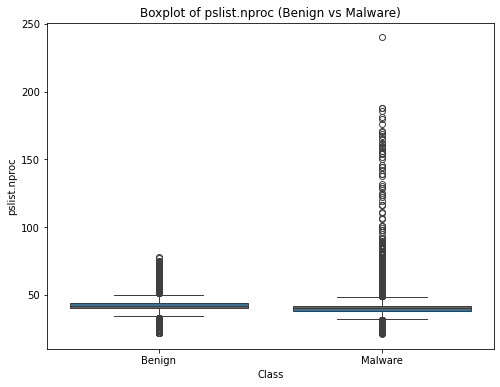

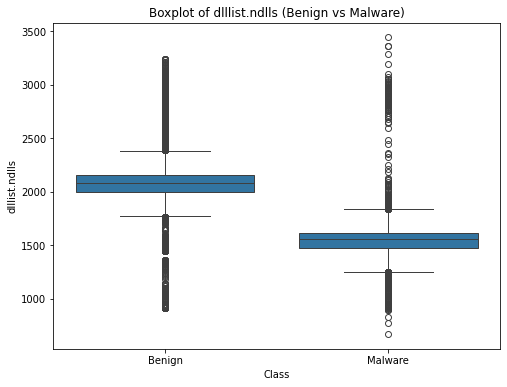

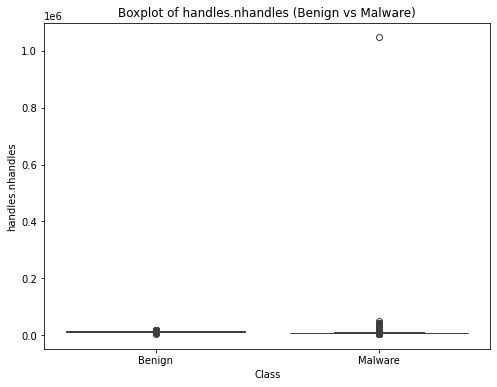

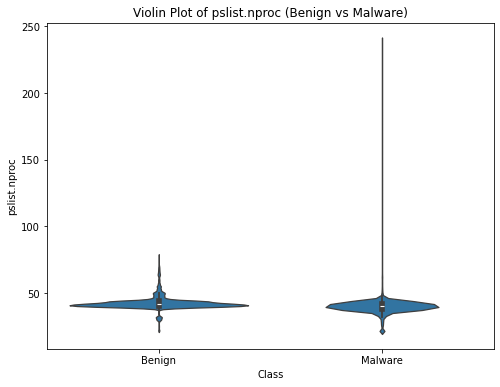

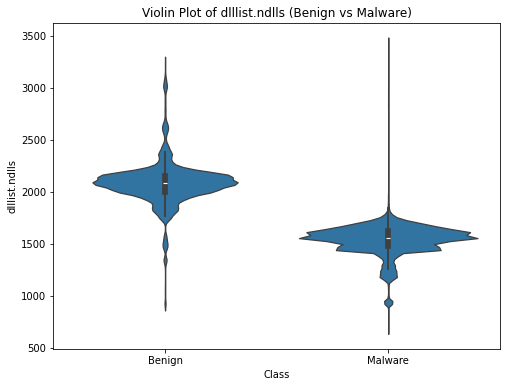

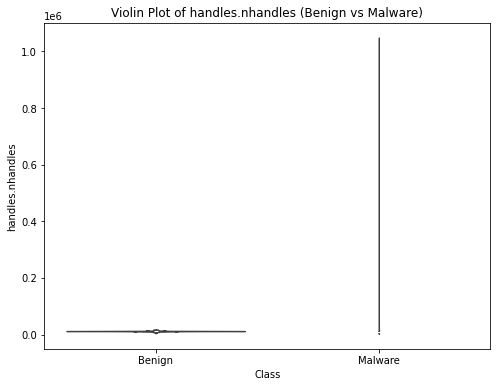

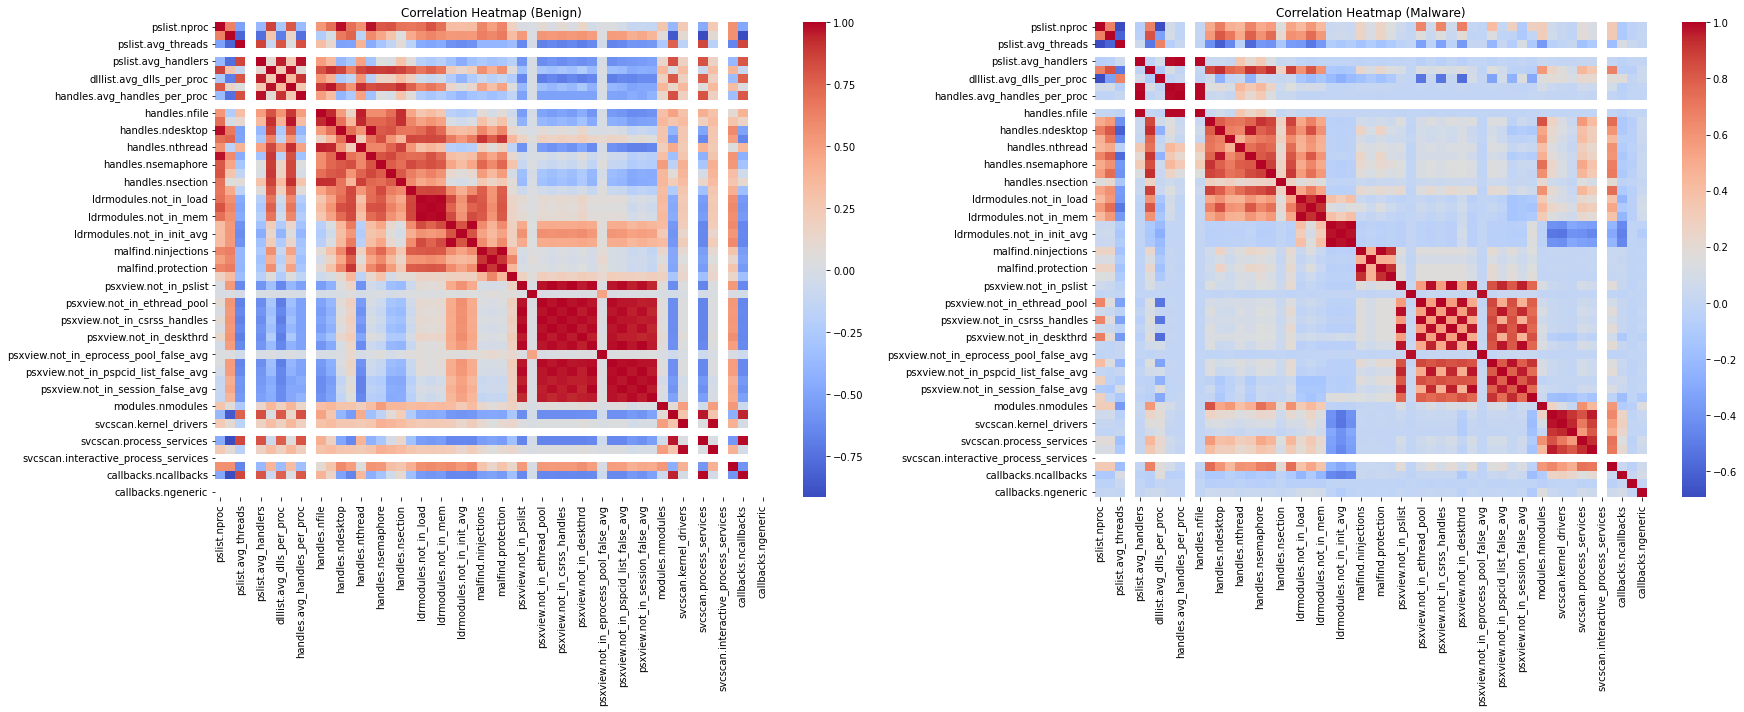

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon

# Load your dataset
file_path = 'Obfuscated-MalMem2022.csv'  # Update this to your local file path
df = pd.read_csv(file_path)

# Separate data into Benign and Malware classes
benign_data = df[df['Class'] == 'Benign'].drop(columns=['Class', 'Category'])
malware_data = df[df['Class'] == 'Malware'].drop(columns=['Class', 'Category'])

# Ensure both dataframes have the same length
min_len = min(len(benign_data), len(malware_data))
benign_data = benign_data[:min_len]
malware_data = malware_data[:min_len]

# 1. Boxplots for some key features
features_to_plot = ['pslist.nproc', 'dlllist.ndlls', 'handles.nhandles']
for feature in features_to_plot:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Class', y=feature, data=df)
    plt.title(f'Boxplot of {feature} (Benign vs Malware)')
    plt.show()

# 2. Violin plots for the same features
for feature in features_to_plot:
    plt.figure(figsize=(8, 6))
    sns.violinplot(x='Class', y=feature, data=df)
    plt.title(f'Violin Plot of {feature} (Benign vs Malware)')
    plt.show()

# # 3. Wilcoxon Signed-Rank Test: Heatmap of P-values
# wilcoxon_pvals = []
# for column in benign_data.columns:
#     try:
#         stat, p_value = wilcoxon(benign_data[column], malware_data[column])
#         wilcoxon_pvals.append(p_value)
#     except ValueError:
#         wilcoxon_pvals.append(None)

# # Create a DataFrame to display P-values
# wilcoxon_results_df = pd.DataFrame({'Feature': benign_data.columns, 'P-value': wilcoxon_pvals})

# # Create a heatmap of p-values
# plt.figure(figsize=(10, 8))
# sns.heatmap(wilcoxon_results_df[['P-value']].T, annot=wilcoxon_results_df[['P-value']], cmap='coolwarm', cbar=False)
# plt.title('Heatmap of Wilcoxon Test P-values (Benign vs Malware)')
# plt.show()

# 4. Correlation heatmap for Benign and Malware
plt.figure(figsize=(25, 10))
plt.subplot(1, 2, 1)
sns.heatmap(benign_data.corr(), cmap="coolwarm", annot=False)
plt.title('Correlation Heatmap (Benign)')
plt.savefig('Correlation Heatmap-Benign.png')
plt.subplot(1, 2, 2)
sns.heatmap(malware_data.corr(), cmap="coolwarm", annot=False)
plt.title('Correlation Heatmap (Malware)')
plt.tight_layout()
plt.savefig('Correlation Heatmap-Malware.png')
plt.show()


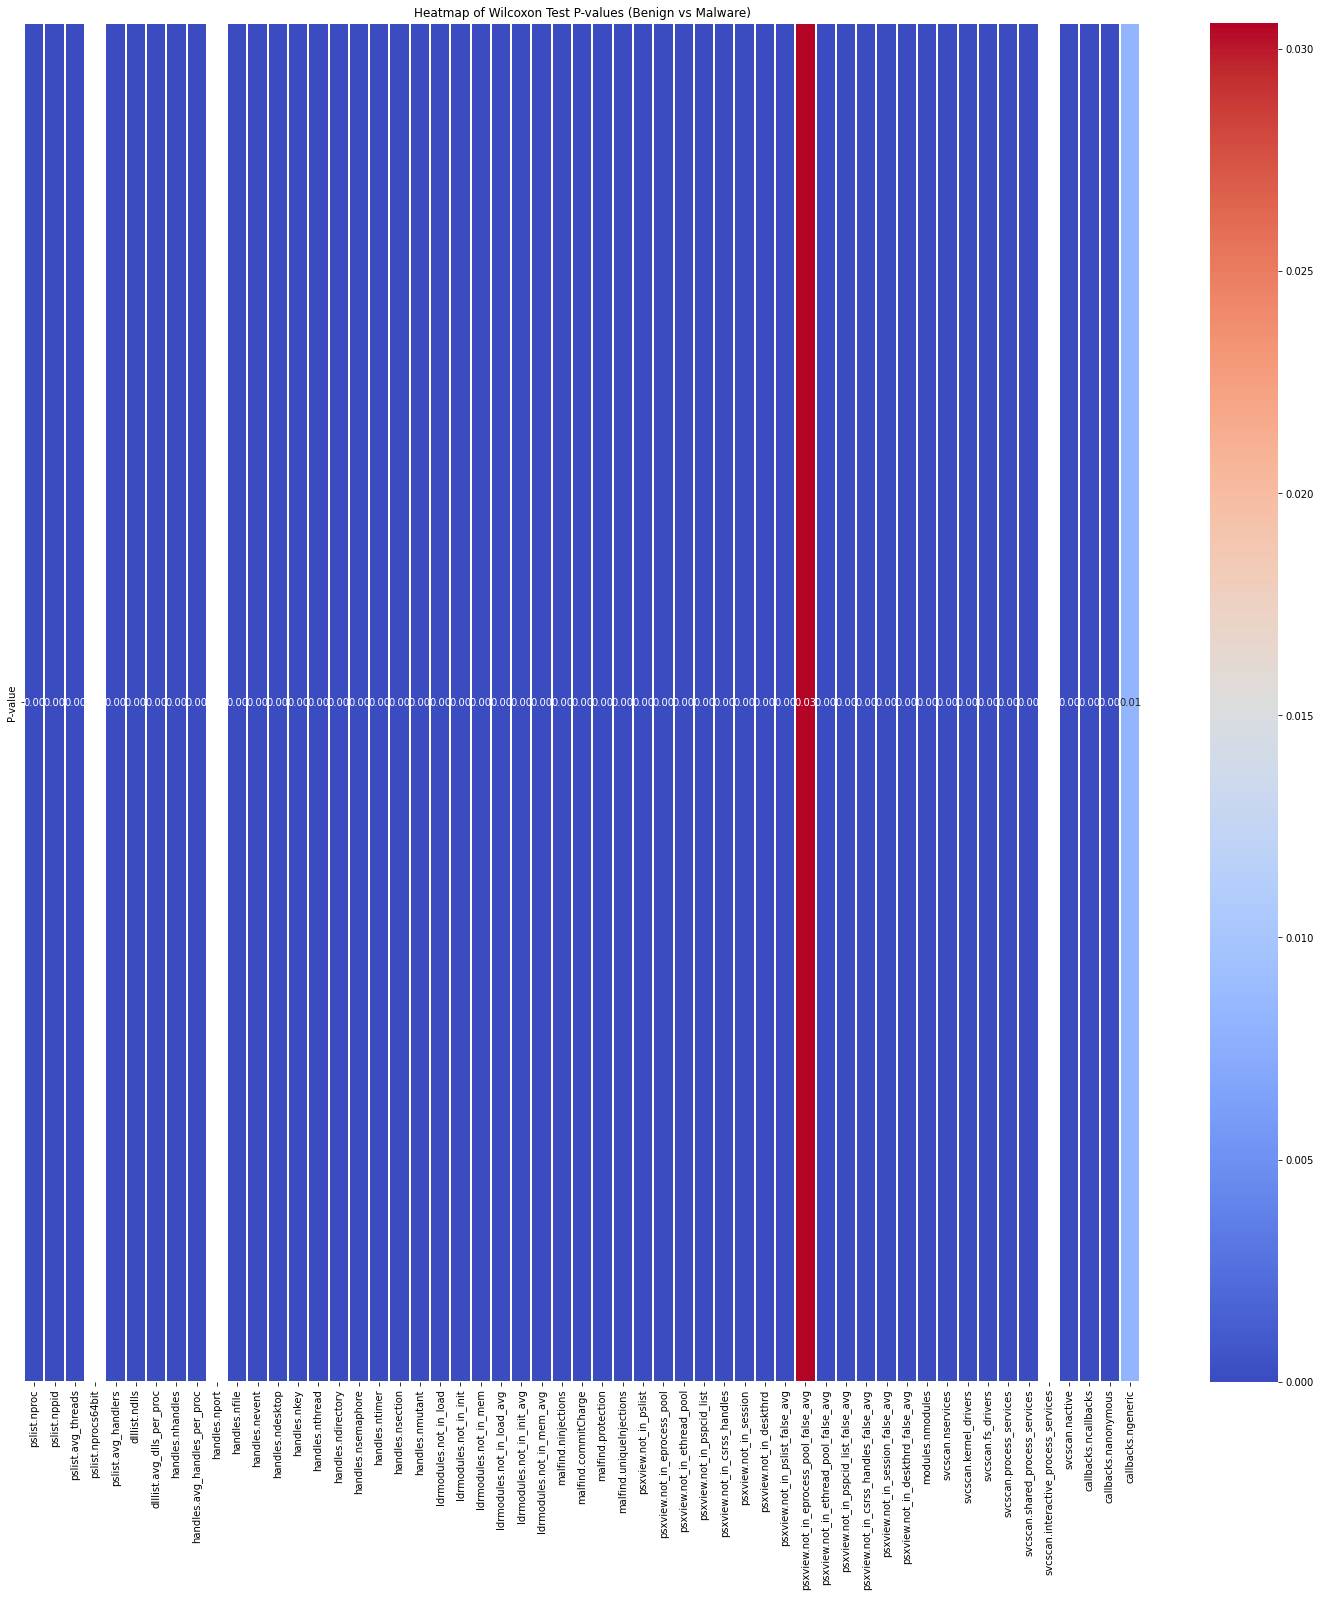

In [7]:
import numpy as np

# Replace None values in p-values list with NaN for plotting
wilcoxon_pvals = [p if p is not None else np.nan for p in wilcoxon_pvals]

# Create a DataFrame to display P-values (reshaped to 2D for heatmap)
wilcoxon_results_df = pd.DataFrame({'P-value': wilcoxon_pvals}, index=benign_data.columns)

# Create a heatmap of p-values
plt.figure(figsize=(25, 25))
sns.heatmap(wilcoxon_results_df.T, annot=True, cmap='coolwarm', cbar=True, fmt=".2f", linewidths=0.2)
plt.title('Heatmap of Wilcoxon Test P-values (Benign vs Malware)')
plt.show()
